In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Read the data
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", header=None, names=cols, encoding="ISO-8859-1")
df.head()

sentiment          id                          date query_string  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009     NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009     NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009     NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [4]:
df.info()
df.sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [6]:
df.head()

sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....

In [7]:
df[df.sentiment == 0].head(10)

sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
5          0                      @Kwesidei not the whole crew 
6          0                                        Need a hug 
7          0  @LOLTrish hey  long time no see! Yes.. Rains a...
8          0               @Tatiana_K nope they didn't have it 
9          0                          @twittera que me muera ?

In [9]:
df[df.sentiment == 4].head(10)

sentiment                                               text
800000          4       I LOVE @Health4UandPets u guys r the best!! 
800001          4  im meeting up with one of my besties tonight! ...
800002          4  @DaRealSunisaKim Thanks for the Twitter add, S...
800003          4  Being sick can be really cheap when it hurts t...
800004          4    @LovesBrooklyn2 he has that effect on everyone 
800005          4  @ProductOfFear You can tell him that I just bu...
800006          4  @r_keith_hill Thans for your response. Ihad al...
800007          4  @KeepinUpWKris I am so jealous, hope you had a...
800008          4  @tommcfly ah, congrats mr fletcher for finally...
800009          4  @e4VoIP I RESPONDED  Stupid cat is helping me ...

In [11]:
df[df.sentiment == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997,
            799998, 799999],
           dtype='int64', length=800000)

In [12]:
df[df.sentiment == 4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

In [13]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

In [14]:
df.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

In [15]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [16]:
df.head()

sentiment                                               text  pre_clean_len
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...            115
1          0  is upset that he can't update his Facebook by ...            111
2          0  @Kenichan I dived many times for the ball. Man...             89
3          0    my whole body feels itchy and like its on fire              47
4          0  @nationwideclass no, it's not behaving at all....            111

In [17]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


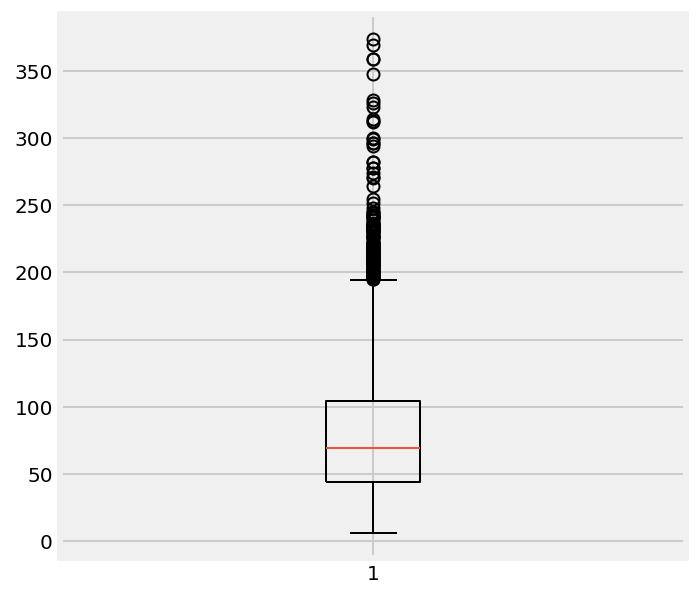

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [19]:
df[df.pre_clean_len > 140].head(10)

sentiment                                               text  \
213           0  Awwh babs... you look so sad underneith that s...   
226           0  Tuesdayï¿½ll start with reflection ï¿½n then a...   
279           0  Whinging. My client&amp;boss don't understand ...   
343           0  @TheLeagueSF Not Fun &amp; Furious? The new ma...   
400           0  #3 woke up and was having an accident - &quot;...   
464           0  My bathtub drain is fired: it haz 1 job 2 do, ...   
492           0  pears &amp; Brie, bottle of Cabernet, and &quo...   
747           0  Have an invite for &quot;Healthy Dining&quot; ...   
957           0  Damnit I was really digging this season of Rea...   
1064          0  Why do I keep looking...I know that what I rea...   

      pre_clean_len  
213             142  
226             141  
279             145  
343             145  
400             144  
464             146  
492             150  
747             141  
957             141  
1064            141

In [20]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [28]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'html5lib')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [29]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [30]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [31]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [32]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [33]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [59]:
testing = df.text[226].encode('ascii', 'ignore')
testing

b'Tuesdayll start with reflection n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [47]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [48]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [89]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    soup = BeautifulSoup(neg_handled, 'html5lib')
    souped = soup.get_text()
    try:
        bom_removed = souped.encode('ascii', 'ignore').decode('utf-8-sig').replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    letters_only = re.sub("[^a-zA-Z]", " ", lower_case)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [83]:
testing = df.text[:100]

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


'is upset that he can not update his Facebook by texting it... and might cry as a result  School today also. Blah!'

In [90]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['awww that bummer you shoulda got david carr of third day to do it',
 'is upset that he can not update his facebook by texting it and might cry as result school today also blah',
 'dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it not behaving at all mad why am here because can not see you all over there',
 'not the whole crew',
 'need hug',
 'hey long time no see yes rains bit only bit lol fine thanks how you',
 'nope they did not have it',
 'que me muera',
 'spring break in plain city it snowing',
 'just re pierced my ears',
 'could not bear to watch it and thought the ua loss was embarrassing',
 'it it counts idk why did either you never talk to me anymore',
 'would ve been the first but did not have gun not really though zac snyder just doucheclown',
 'wish got to watch it with you miss you and how was the premiere',
 'hollis death scene will hurt me severely to watch on film wry is directors cut no

In [91]:
nums = [0,400000,800000,1200000,1600000]

In [94]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed", (i+1, nums[1]))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets %d of %d has been processed (10000, 400000)
Tweets %d of %d has been processed (20000, 400000)
Tweets %d of %d has been processed (30000, 400000)
Tweets %d of %d has been processed (40000, 400000)
Tweets %d of %d has been processed (50000, 400000)
Tweets %d of %d has been processed (60000, 400000)
Tweets %d of %d has been processed (70000, 400000)
Tweets %d of %d has been processed (80000, 400000)
Tweets %d of %d has been processed (90000, 400000)
Tweets %d of %d has been processed (100000, 400000)
Tweets %d of %d has been processed (110000, 400000)
Tweets %d of %d has been processed (120000, 400000)
Tweets %d of %d has been processed (130000, 400000)
Tweets %d of %d has been processed (140000, 400000)
Tweets %d of %d has been processed (150000, 400000)
Tweets %d of %d has been processed (160000, 400000)
Tweets %d of %d has been processed (170000, 400000)
Tweets %d of %d has been processed (180000, 400000)
Tweets %d of %d has been processed (1

In [95]:
len(clean_tweet_texts)

400000

In [97]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets {0} of {1} has been processed".format(i+1, nums[1]))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 400000 has been processed
Tweets 420000 of 400000 has been processed
Tweets 430000 of 400000 has been processed
Tweets 440000 of 400000 has been processed
Tweets 450000 of 400000 has been processed
Tweets 460000 of 400000 has been processed
Tweets 470000 of 400000 has been processed
Tweets 480000 of 400000 has been processed
Tweets 490000 of 400000 has been processed
Tweets 500000 of 400000 has been processed
Tweets 510000 of 400000 has been processed
Tweets 520000 of 400000 has been processed
Tweets 530000 of 400000 has been processed
Tweets 540000 of 400000 has been processed
Tweets 550000 of 400000 has been processed
Tweets 560000 of 400000 has been processed
Tweets 570000 of 400000 has been processed
Tweets 580000 of 400000 has been processed
Tweets 590000 of 400000 has been processed
Tweets 600000 of 400000 has been processed
Tweets 610000 of 400000 has been processed
Tweets 620000 of 400000 has been processed
Tweets 630000 of 4

In [98]:
len(clean_tweet_texts)

800000

In [99]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets {0} of {1} has been processed".format(i+1, nums[3]))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [100]:
len(clean_tweet_texts)

1200000

In [101]:
%%time
print("Cleaning and parsing the tweets...\n")
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets {0} of {1} has been processed".format(i+1, nums[4]))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1

In [102]:
len(clean_tweet_texts)

1600000

In [103]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

text  target
0  awww that bummer you shoulda got david carr of...       0
1  is upset that he can not update his facebook b...       0
2  dived many times for the ball managed to save ...       0
3     my whole body feels itchy and like its on fire       0
4  no it not behaving at all mad why am here beca...       0

In [104]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [105]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

/home/skhan/.conda/envs/workspace/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


text  target
0  awww that bummer you shoulda got david carr of...       0
1  is upset that he can not update his facebook b...       0
2  dived many times for the ball managed to save ...       0
3     my whole body feels itchy and like its on fire       0
4  no it not behaving at all mad why am here beca...       0

In [106]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596044 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [107]:
my_df[my_df.isnull().any(axis=1)].head()

text  target
208  NaN       0
249  NaN       0
282  NaN       0
398  NaN       0
430  NaN       0

In [108]:
np.sum(my_df.isnull().any(axis=1))

3956

In [109]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [110]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596044 entries, 0 to 1596043
Data columns (total 2 columns):
text      1596044 non-null object
target    1596044 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [111]:
x = my_df.text
y = my_df.target

In [115]:
from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

/home/skhan/.conda/envs/workspace/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [117]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train), (len(x_train[y_train == 0]) / (len(x_train)*1.))*100, (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564123 entries with 50.01% negative, 49.99% positive
Validation set has total 15960 entries with 50.30% negative, 49.70% positive
Test set has total 15961 entries with 49.33% negative, 50.67% positive


In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

In [124]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy, tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [127]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 81.10%
train and test time: 220.47s
Validation result for 20000 features
accuracy score: 81.62%
train and test time: 228.97s
Validation result for 30000 features
accuracy score: 81.80%
train and test time: 206.41s
Validation result for 40000 features
accuracy score: 82.03%
train and test time: 181.77s
Validation result for 50000 features
accuracy score: 82.06%
train and test time: 227.75s
Validation result for 60000 features
accuracy score: 82.16%
train and test time: 248.38s
Validation result for 70000 features
accuracy score: 82.31%
train and test time: 251.69s
Validation result for 80000 features
accuracy score: 82.49%
train 

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

text_clf = Pipeline([('vect', CountVectorizer()),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf', LogisticRegression()),
... ])

In [139]:
text_clf = Pipeline([('vect', tvec),
                     ('clf', lr),
                    ])
s = ['I love u', 'i hate u']
text_clf.predict(s)

array([1, 0])

In [140]:
from sklearn.externals import joblib
joblib.dump(lr, 'classification.pkl') 
joblib.dump(tvec, 'vector.pkl') 

['vector.pkl']

In [141]:
cl = joblib.load('classification.pkl') 
ve = joblib.load('vector.pkl') 
text_clf = Pipeline([('vect', ve),
                     ('clf', cl),
                    ])
s = ['I love u', 'i hate u']
text_clf.predict(s)
accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-"*80)
    print("Classification Report\n")
    print(classification_report(y_test, y_pred, target_names=['negative','positive']))

array([1, 0])

In [ ]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-"*80)
    print("Classification Report\n")
    print(classification_report(y_test, y_pred, target_names=['negative','positive']))